# Marginal Gaussianization

In this demonstration, we will show a few ways to perform univariate Gaussianization on our data.

* Quantile Transformation

We will also discuss some of the caveats that come when working with this.



#### Resources

* [StackOverflow Overview](https://stats.stackexchange.com/questions/325570/quantile-transformation-with-gaussian-distribution-sklearn-implementation)
* [sklearn implementation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html#sklearn.preprocessing.QuantileTransformer)

In [1]:
import os, sys
cwd = os.getcwd()
sys.path.insert(0, f"{cwd}/../")

# Import RBIG Function
import numpy as np
from rbig.data import ToyData
from rbig.linear import OrthogonalTransform
from rbig.gaussian import QuantileGaussian
from scipy import stats

# Plot Functions
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

%load_ext autoreload
%autoreload 2

## Data

In [2]:
def plot_2d_joint(data, color='blue'):
    
    fig  = plt.figure(figsize=(5, 5))

    g = sns.jointplot(x=data[:, 0], y=data[:, 1], kind='hex', color=color)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Original Data')
    plt.tight_layout()
    plt.show()
    
def plot_prob(data, probs):
    
    fig, ax = plt.subplots()

    h = ax.scatter(data[:, 0], data[:, 1], s=1, c=probs)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    cbar = plt.colorbar(h, )
    plt.show()

<Figure size 360x360 with 0 Axes>

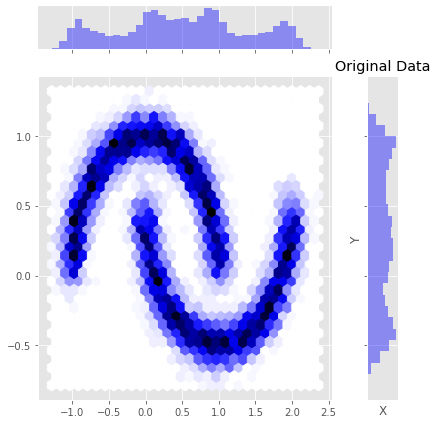

In [3]:
seed = 123
rng = np.random.RandomState(seed=seed)
dataset = 'moons'
n_samples = 10_000
noise = 0.1
random_state=123


data = ToyData(dataset, n_samples, noise, random_state).generate_samples()
X = data[:, 0]
Y = data[:, 1]

plot_2d_joint(data)

## Quantile Transformation

So for this first demonstration, we will look at how we can use the `QuantileTransform` function that's built in the scikit-learn library. There are a few problems with this method but we will address them later.

In [4]:
n_quantiles = 1_000
subsample = 10_000
random_state = 123

transformer = QuantileGaussian(
    n_quantiles=n_quantiles,
    subsample = subsample,
    random_state=random_state
)

transformer.fit(data);

### Forward Transformation

<Figure size 360x360 with 0 Axes>

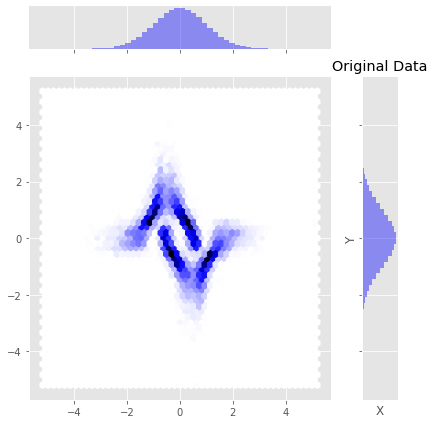

In [5]:
data_trans = transformer.transform(data)

plot_2d_joint(data_trans)

So clearly we can see that the transformation works. Both of the marginals are Gaussian.

### Inverse Transformation

<Figure size 360x360 with 0 Axes>

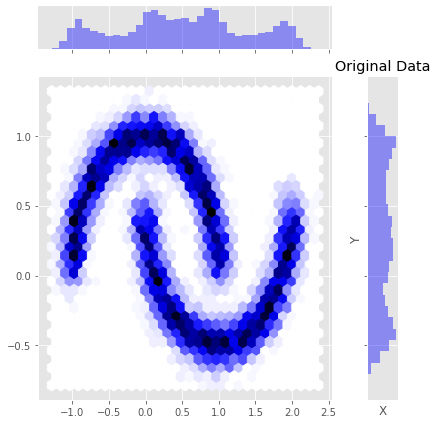

In [6]:
data_ori = transformer.inverse_transform(data_trans)

# check that its more or less equal
np.testing.assert_array_almost_equal(data_ori, data)

plot_2d_joint(data_ori)

### Log Determinant Jacobian

$$\begin{aligned}
\frac{d iF}{dx} &= \frac{1}{f (iF (x)) } \\
\log \left( \frac{dF^{-1}}{dx} \right)&= - \log f (iF (x)) \\
&=  \log J^{-1}
\end{aligned}$$


In [7]:
# score samples 
log_prob = transformer.score_samples(data)

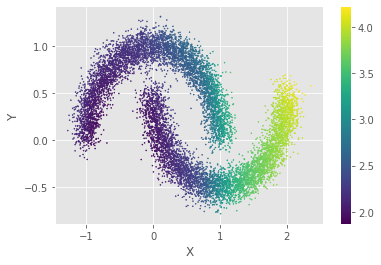

In [8]:
plot_prob(data, log_prob)

### Log Likelihood of Data

We need to take the expected value (mean) of all log probabilities.

$$\text{loglikelihood} = \frac{1}{N} \sum_{n=1}^{N} \log p(X|\mathcal{N})$$

In [13]:
score = transformer.score(data)

print(f"Mean Log-Likelihood Score: {score:.4f}")

Mean Log-Likelihood Score: 2.7165
